# Gaussian

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


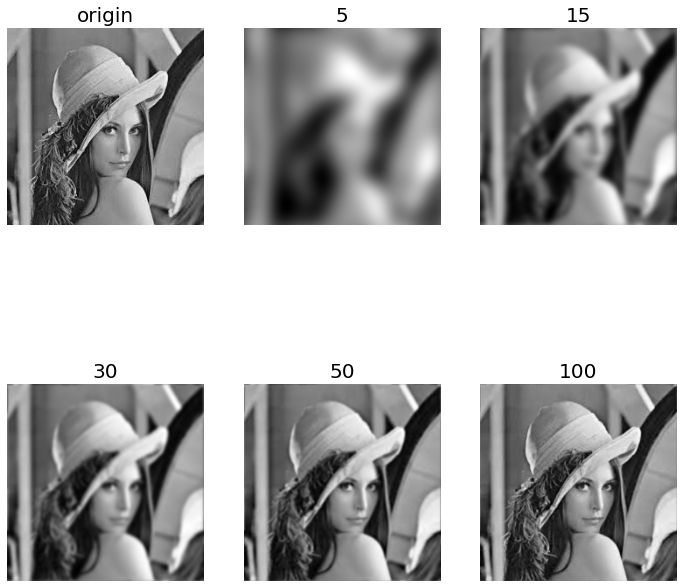

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def fourier_trans(src):
    fft_src = np.fft.fft2(src)
    ctr_src = np.fft.fftshift(fft_src)
    plt_src = np.log(np.abs(ctr_src))

    return ctr_src, plt_src


def inv_fourier_trans(src):
    inv_ctr_img = np.fft.ifftshift(src)
    ifft_img = np.fft.ifft2(inv_ctr_img)

    return ifft_img


def guass_low_pass_filter(source, radius=5):
    # get the paras
    filter_radius = radius
    img = source

    # set paras for filter
    height, weight = img.shape
    center_h = int(height / 2)
    center_w = int(weight / 2)

    # initialize filter
    guass_low_pass_filter = np.zeros_like(img)

    # set the pass area
    for i in range(height):
        for j in range(weight):
            dist_from_center = np.sqrt(np.power((i - center_h), 2) + np.power((j - center_w), 2))
            guass_low_pass_filter[i][j] = np.exp(-(np.power(dist_from_center, 2) / np.power(radius, 2)))

    # filter the image
    filtered_img = np.multiply(img, guass_low_pass_filter)

    return filtered_img


img_path = "/content/lena.jpg"
src = np.array(Image.open(img_path).convert("L"))
fft_src, _ = fourier_trans(src)

img_list = [src]
radius_list = ['origin', 5, 15, 30, 50, 100]
for i in radius_list[1:]:
    img_list.append(inv_fourier_trans(guass_low_pass_filter(fft_src, i)))

img_list_name = radius_list

_, img_xy = plt.subplots(2, 3, figsize=(12, 12))

for i in range(2):
    for j in range(3):
        img_xy[i][j].imshow(np.abs(img_list[i * 3 + j]), cmap="gray")
        img_xy[i][j].set_title(img_list_name[i * 3 + j], size=20)
        img_xy[i][j].axis("off")

plt.show()